In [1]:
# Installing dependencies
!pip install pyyaml==6.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [2]:
# !python -m pip install pyyaml==6.
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'detectron2'...
remote: Enumerating objects: 15297, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 15297 (delta 7), reused 11 (delta 5), pack-reused 15275
Receiving objects: 100% (15297/15297), 6.18 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (11122/11122), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=039c2d48b601ca6005d58a9814b4461991d4f156deb731ff1fcdf73d9962fd15
 

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [4]:
import detectron2
import os, sys
import numpy as np
import json, cv2, random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Utilities require from detectron2

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

## Running a Pretrained detectron2 model

In [5]:
 #  detectron2 model which we are using for inferencing

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for the model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')

predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:01, 173MB/s]                           


In [6]:
 def show_img(path, extra=False):
  im = cv2.imread(path)
  outputs = predictor(im)
  if extra:
    print(outputs['instances'].pred_classes)
    print(outputs['instances'].pred_boxes)

  # using Visualizer to draw predictions on the image
  v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=1.2)
  out = v.draw_instance_predictions(outputs['instances'].to('cpu'))
  cv2_imshow(out.get_image()[:,:,::-1])


In [ ]:
img_path = ['/content/horses.jpeg','/content/images (1).jpeg','/content/images.jpeg']

for i in range(len(img_path)):
  print('Image:',i)
  show_img(img_path[i])

Image: 0


AttributeError: ignored

In [ ]:
im = cv2.imread('/content/images.jpeg')

In [ ]:
# inference using panoptic segmentation model

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for the model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml')

predictor = DefaultPredictor(cfg)

[12/21 14:17:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...


model_final_cafdb1.pkl: 261MB [00:05, 48.4MB/s]                           


In [ ]:
panoptic_seg, segments_info = predictor(im)['panoptic_seg']

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to('cpu'),segments_info)
cv2_imshow(out.get_image()[:,:,::-1])


AttributeError: ignored

### Downloading out dataset

In [7]:
!pip install kaggle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [11]:
!kaggle datasets download -d chitholian/annotated-potholes-dataset

 96% 44.0M/45.9M [00:03<00:00, 22.8MB/s]
100% 45.9M/45.9M [00:03<00:00, 14.6MB/s]


In [12]:
import zipfile

# Define the path to your zip file
file_path = '/content/annotated-potholes-dataset.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/potholes')  # Replace 'destination_folder' with your desired folder

In [13]:
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from detectron2.structures import BoxMode

def getPotholesdict(path):
    files = os.listdir(path)
    idx = -1
    dataset_dict = []

    for file in files:
        if file.endswith('.jpg'):
            idx += 1
            record = {}
            filename = os.path.join(path, file)
            height, width = cv2.imread(filename).shape[:2]

            record['file_name'] = filename
            record['image_id'] = idx
            record['height'] = height
            record['width'] = width

            # Parse XML file
            xml_file = os.path.join(path, file[:-4] + '.xml')
            tree = ET.parse(xml_file)
            root = tree.getroot()

            objs = []
            for obj in root.findall('.//object'):
                bbox = obj.find('bndbox')
                xmin = float(bbox.find('xmin').text)
                ymin = float(bbox.find('ymin').text)
                xmax = float(bbox.find('xmax').text)
                ymax = float(bbox.find('ymax').text)

                annotation = {
                    "bbox": [xmin, ymin, xmax, ymax],
                    "bbox_mode": BoxMode.XYXY_ABS,
                    "category_id": 0,  # You may adjust the category ID as needed
                }
                objs.append(annotation)

            record['annotations'] = objs
            dataset_dict.append(record)

    return dataset_dict


In [14]:
dataset = getPotholesdict('Potholes')

In [ ]:
len(dataset)

In [15]:
data_1 = dataset[0]

In [16]:
data_1

{'file_name': 'Potholes/img-276.jpg',
 'image_id': 0,
 'height': 720,
 'width': 720,
 'annotations': [{'bbox': [266.0, 307.0, 485.0, 483.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0}]}

### Registering our data

In [17]:
# register into catalog
d = 0
DatasetCatalog.register("Potholes", lambda d=d:getPotholesdict("Potholes"))
MetadataCatalog.get("Potholes").set(thing_classes = ["Potholes"])
Potholes_metadata = MetadataCatalog.get("Potholes")

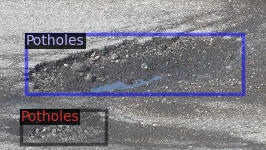

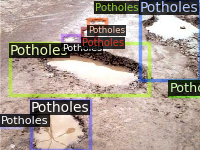

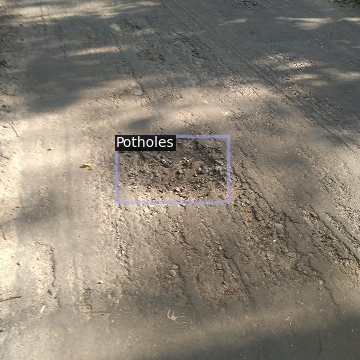

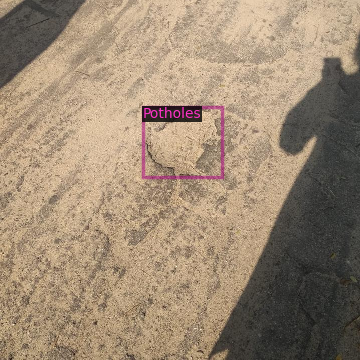

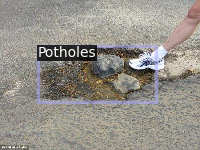

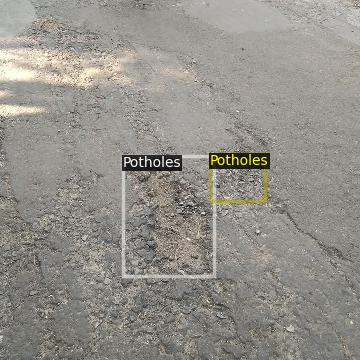

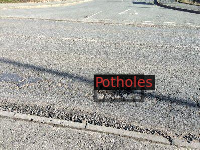

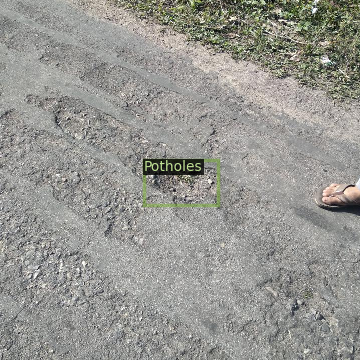

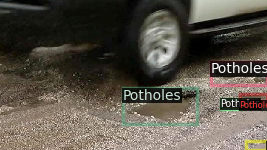

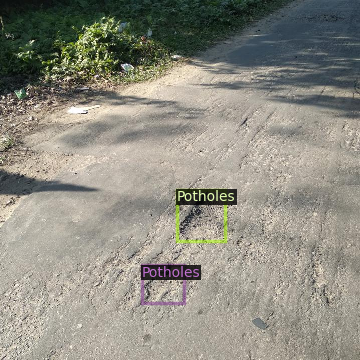

In [18]:
dataset_dicts = getPotholesdict("Potholes")

for d in random.sample(dataset_dicts, 10):
  img = cv2.imread (d["file_name"])
  visualizer = Visualizer(img[:,:,:: -1], metadata=Potholes_metadata, scale=0.5)
  out = visualizer.draw_dataset_dict(d)
  cv2_imshow(out.get_image()[:, :, ::-1])

### Visualizing the results with tensorboard


In [ ]:
%load_ext tensorboard
%tensorboard --logdir output

## Training our custom model

- Here tranfer learning is done using Faster_RCNN architectures
- And to initialize the weight I have used Weights of COCO datasets
- then I have done configuration of model parameters in `cfg` file

In [20]:
#! Train
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("Potholes")
cfg.DATASETS.TEST = ()
cfg.DATALOADER. NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025 # pick a good LR 0. 00025
cfg.SOLVER.MAX_ITER = 300 # 300 iterations seems good enough for this whale dataset; you may need to tra:
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 # faster, and good enough for this toy dataset (default: 5:
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # only has one class (Potholes)

os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume = False)
trainer.train()

[12/21 14:30:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:01, 160MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[12/21 14:30:49 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/21 14:31:02 d2.utils.events]:  eta: 0:02:00  iter: 19  total_loss: 1.248  loss_cls: 0.704  loss_box_reg: 0.3762  loss_rpn_cls: 0.1548  loss_rpn_loc: 0.02058    time: 0.4231  last_time: 0.2749  data_time: 0.0257  last_data_time: 0.0134   lr: 1.6068e-05  max_mem: 2719M
[12/21 14:31:13 d2.utils.events]:  eta: 0:01:55  iter: 39  total_loss: 1.083  loss_cls: 0.5585  loss_box_reg: 0.3541  loss_rpn_cls: 0.1152  loss_rpn_loc: 0.01666    time: 0.4368  last_time: 0.5644  data_time: 0.0181  last_data_time: 0.0790   lr: 3.2718e-05  max_mem: 2758M
[12/21 14:31:21 d2.utils.events]:  eta: 0:01:43  iter: 59  total_loss: 0.9612  loss_cls: 0.4176  loss_box_reg: 0.4772  loss_rpn_cls: 0.06888  loss_rpn_loc: 0.01789    time: 0.4195  last_time: 0.3568  data_time: 0.0136  last_data_time: 0.0164   lr: 4.9367e-05  max_mem: 2758M
[12/21 14:31:30 d2.utils.events]:  eta: 0:01:34  iter: 79  total_loss: 1.073  loss_cls: 0.3897  loss_box_reg: 0.4881  loss_rpn_cls: 0.08942  loss_rpn_loc: 0.02504    time: 0.4190  

- After completion of training `output` folder is created and `model_final.pth` is the main file which contains all the information of our custom model - weights, architecture

### Next step is to inference our custom model and evaluate its perfomance

In [21]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

[12/21 14:38:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


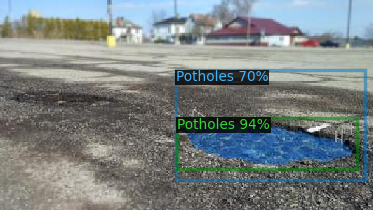

In [36]:
from detectron2.utils.visualizer import ColorMode

d = random.choice(dataset_dicts)
im = cv2.imread(d["file_name"])
outputs = predictor(im)
v = Visualizer(im[:, :, :: -1],
               metadata=Potholes_metadata,
               scale=0.7,)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :,::-1])

## Evaluate the model's performance

In [42]:
## Evaluate the performance of our model

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator('Potholes', ['bbox'], False, output_dir='./output/')

val_loader = build_detection_test_loader(cfg, 'Potholes')

print(inference_on_dataset(trainer.model, val_loader, evaluator))


[12/21 15:19:10 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[12/21 15:19:10 d2.evaluation.coco_evaluation]: Trying to convert 'Potholes' to COCO format ...
[12/21 15:19:10 d2.data.datasets.coco]: Converting annotations of dataset 'Potholes' to COCO format ...)
[12/21 15:19:13 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/21 15:19:13 d2.data.datasets.coco]: Conversion finished, #images: 665, #annotations: 1740
[12/21 15:19:13 d2.data.datasets.coco]: Caching COCO format annotations at './output/Potholes_coco_format.json' ...
[12/21 15:19:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/21 15:19:17 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/21 15:19:17 d2.data.common]: Serializing 665 elements to byte tensors and concatenating them 

## Testing for video

In [41]:
from detectron2.utils.visualizer import ColorMode
import cv2
import tempfile
import shutil
import os

# Assuming predictor and dataset_dicts are defined earlier

video_path = "/content/potholes_video2.mp4"  # Change this to the path of your video file
cap = cv2.VideoCapture(video_path)

# Get video details
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object
output_path = "/content/temp_vid"  # Change this to the desired output path
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    outputs = predictor(frame)
    v = Visualizer(frame[:, :, ::-1],
                   metadata=Potholes_metadata,
                   scale=0.7,
                   )
    out_frame = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()[:, :, ::-1]

    # Write the processed frame to the output video
    out.write(out_frame)

cap.release()
out.release()

# Remove temporary directory
# shutil.rmtree(temp_dir)

print(f"Video saved to: {output_path}")


KeyboardInterrupt: ignored